## Introduction

We have explored the fundamentals of machine learning using the k-nearest neighbors algorithm. In this guided project, we will practice the machine learning workflow we've learned so far to predict a car's market price using its attributes. 

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. 

Read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

## Exploring dataset

In [1]:
import pandas as pd
cars = pd.read_csv("imports-85.data")
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


The dataset does not have a header row. We will create one using the documentation. The documentation has column values.

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)

In [3]:
pd.set_option('display.max_columns', None)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Determine which columns are numeric features
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numerical_cars = cars[numeric_cols]

In [5]:
numerical_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500,16,22,?


In [6]:
# replace all of the ? values with the numpy.nan missing value

import numpy as np
numerical_cars  = numerical_cars.replace('?', np.nan)

In [7]:
# Check for null values
numerical_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
# Remove any rows with missing `price` values, since price is the value we need to predict
numerical_cars = numerical_cars.dropna(subset=['price'])

In [9]:
# Replace missing values in other columns using column means
numerical_cars = numerical_cars.fillna(numerical_cars.mean())

In [10]:
# Check for null values again!
numerical_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

fillna() didnt work for some columns. Wonder why!

In [11]:
numerical_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-size          201 non-null int64
bore                 197 non-null object
stroke               197 non-null object
compression-rate     201 non-null float64
horsepower           199 non-null object
peak-rpm             199 non-null object
city-mpg             201 non-null int64
highway-mpg          201 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 25.1+ KB


dtypes is the culprit!

In [12]:
numerical_cars = numerical_cars.astype('float')

In [13]:
numerical_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null float64
engine-size          201 non-null float64
bore                 197 non-null float64
stroke               197 non-null float64
compression-rate     201 non-null float64
horsepower           199 non-null float64
peak-rpm             199 non-null float64
city-mpg             201 non-null float64
highway-mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 25.1 KB


In [14]:
# Replace missing values in other columns using column means
numerical_cars = numerical_cars.fillna(numerical_cars.mean())

In [15]:
numerical_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now missing values have all been handled finally!!

In [16]:
# Normalize the numeric ones so all values range from 0 to 1
normalized_df = (numerical_cars - numerical_cars.mean()) / numerical_cars.std()
normalized_df

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,0.036224
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,0.414350
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,0.414350
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.430252,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,0.093477
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,0.219617,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,0.533891
5,0.000000,0.165335,0.251498,0.195551,-0.272351,-0.094079,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,0.257060
6,1.125132,1.154395,1.501278,2.622423,0.789818,0.557385,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,0.566608
7,0.000000,1.154395,1.501278,2.622423,0.789818,0.770029,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,0.718865
8,1.125132,1.154395,1.501278,2.622423,0.871523,1.025201,0.099271,-0.748720,0.452769,-0.465492,0.979591,0.799836,-1.273365,-1.568060,1.342366
10,2.187756,0.396116,0.210921,-0.518235,0.217881,-0.310589,-0.454322,0.631507,-1.445680,-0.340647,-0.064150,1.427302,-0.339254,-0.247473,0.405542


In [17]:
# Let us retain the 'price' column since it is our target column
normalized_df['price'] = numerical_cars['price']

In [18]:
normalized_df

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.430252,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,13950.0
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,0.219617,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,17450.0
5,0.000000,0.165335,0.251498,0.195551,-0.272351,-0.094079,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,15250.0
6,1.125132,1.154395,1.501278,2.622423,0.789818,0.557385,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,17710.0
7,0.000000,1.154395,1.501278,2.622423,0.789818,0.770029,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,18920.0
8,1.125132,1.154395,1.501278,2.622423,0.871523,1.025201,0.099271,-0.748720,0.452769,-0.465492,0.979591,0.799836,-1.273365,-1.568060,23875.0
10,2.187756,0.396116,0.210921,-0.518235,0.217881,-0.310589,-0.454322,0.631507,-1.445680,-0.340647,-0.064150,1.427302,-0.339254,-0.247473,16430.0


In [19]:
normalized_df.shape

(201, 15)

In [20]:
normalized_df.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [21]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    201 non-null float64
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null float64
engine-size          201 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-null float64
city-mpg             201 non-null float64
highway-mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 25.1 KB


In [22]:
normalized_df.columns


Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

## Univariate k-nearest neighbors models with default k value

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor() #default k=5
    np.random.seed(1)
        
    # Randomize order of rows in df to avoid bias
    shuffled_index = np.random.permutation(df.index)
    randomized_df = df.reindex(shuffled_index)

    # To find mid point to split
    mid = int(len(randomized_df) / 2)
    
    # Split train-test
    train_df = randomized_df.iloc[0:mid]
    test_df = randomized_df.iloc[mid:]
    
    # Fit a KNN model to data
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Use model to make predictions
    predicted_price = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE
    mse = mean_squared_error(test_df[target_col], predicted_price)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# For each column, train a model, return RMSE value
# and add to the dictionary rmse_results
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', normalized_df)
    rmse_results[col] = rmse_val

print(rmse_results)

{'length': 5429.644739577333, 'engine-size': 3297.6997444813674, 'wheel-base': 5461.490335934409, 'horsepower': 4047.376554982472, 'curb-weight': 4453.680702653493, 'bore': 6793.0574839170895, 'compression-rate': 6606.571345933599, 'highway-mpg': 4625.047587445843, 'height': 8132.467731772246, 'stroke': 8006.096427246941, 'width': 4772.510209128695, 'peak-rpm': 7643.0703228739185, 'normalized-losses': 7337.2848203845515, 'city-mpg': 4754.637378183515}


In [24]:
# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3297.699744
horsepower           4047.376555
curb-weight          4453.680703
highway-mpg          4625.047587
city-mpg             4754.637378
width                4772.510209
length               5429.644740
wheel-base           5461.490336
compression-rate     6606.571346
bore                 6793.057484
normalized-losses    7337.284820
peak-rpm             7643.070323
stroke               8006.096427
height               8132.467732
dtype: float64

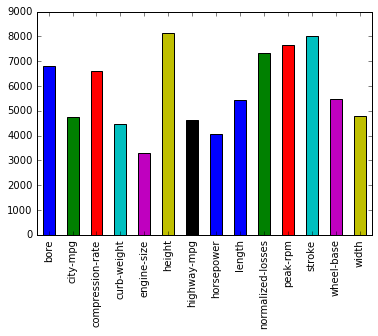

In [25]:
# Visualize the rmse result

import matplotlib.pyplot as plt
%matplotlib inline

rmse_results_series.plot.bar()


We just used the function knn_train_test() to train and test Univariate models using different numeric columns in the dataset.

Numeric features used: 
    
- 'normalized-losses'
- 'wheel-base'
- 'length'
- 'width'
- 'height'
- 'curb-weight'
- 'engine-size' 
- 'bore'
- 'stroke'
- 'compression-rate'
- 'horsepower'
- 'peak-rpm' 
- 'city-mpg' 
- 'highway-mpg'

Columns that performed best(first 5) using the default k value are:

- 'engine-size'
- 'horsepower'
- 'curb-weight'
- highway-mpg
- city-mpg 

## Univariate model that accepts a parameter for the k value

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    # Randomize order of rows in df to avoid bias
    shuffled_index = np.random.permutation(df.index)
    randomized_df = df.reindex(shuffled_index)
    
    # To find mid point to split
    mid = int(len(randomized_df) / 2)
    # Split train-test
    train_df = randomized_df.iloc[0:mid]
    test_df = randomized_df.iloc[mid:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Instatiate ML model
        knn = KNeighborsRegressor(n_neighbors=k) 
        # Fit a KNN model to data
        knn.fit(train_df[[train_col]], train_df[target_col])
        # Use model to make predictions
        predicted_price = knn.predict(test_df[[train_col]])
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], predicted_price)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}
train_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# For each column, train a model, return RMSE value
# and add to the dictionary rmse_results
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', normalized_df)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6977.123411794459,
  5: 6793.0574839170895,
  7: 6828.8678082042015,
  9: 6865.299025218018},
 'city-mpg': {1: 5901.143574354764,
  3: 4608.180446380397,
  5: 4754.637378183515,
  7: 5035.456896910003,
  9: 5333.1616578530175},
 'compression-rate': {1: 8083.070177540802,
  3: 7379.623321663306,
  5: 6606.571345933599,
  7: 6732.032905446027,
  9: 7019.9512505224375},
 'curb-weight': {1: 5288.0195725810245,
  3: 5011.8789151002,
  5: 4453.680702653493,
  7: 4330.149364501495,
  9: 4632.92525121302},
 'engine-size': {1: 3227.659787364569,
  3: 2946.7417879781224,
  5: 3297.6997444813674,
  7: 3563.43509928404,
  9: 3831.764970642862},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8132.467731772246,
  7: 7704.344964170201,
  9: 7779.56469282989},
 'highway-mpg': {1: 6025.594966720739,
  3: 4627.908507167689,
  5: 4625.047587445843,
  7: 4722.975580907234,
  9: 5201.019510000462},
 'horsepower': {1: 4170.054848037801,
  3: 4010.5218032337

Let us visualize the RMSE resluts for each numeric column for k values 1,3,5,7,9. 

Let us convert the dictionary keys and values into a seperate list. Since dictionary data structure does not support plot().

In [27]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    print(x)
    print(y)
    
   

[1, 3, 9, 5, 7]
[4577.003915399697, 5087.460276710444, 5383.054514833446, 5429.644739577333, 5307.702178308323]
[1, 3, 9, 5, 7]
[3227.659787364569, 2946.7417879781224, 3831.764970642862, 3297.6997444813674, 3563.43509928404]
[1, 3, 9, 5, 7]
[4493.734068810494, 5120.161506064513, 5738.621574471594, 5461.490335934409, 5448.173408324034]
[1, 3, 9, 5, 7]
[4170.054848037801, 4010.5218032337666, 4505.9694416104885, 4047.376554982472, 4383.729138557079]
[1, 3, 9, 5, 7]
[5288.0195725810245, 5011.8789151002, 4632.92525121302, 4453.680702653493, 4330.149364501495]
[1, 3, 9, 5, 7]
[8602.58848450066, 6977.123411794459, 6865.299025218018, 6793.0574839170895, 6828.8678082042015]
[1, 3, 9, 5, 7]
[8083.070177540802, 7379.623321663306, 7019.9512505224375, 6606.571345933599, 6732.032905446027]
[1, 3, 9, 5, 7]
[6025.594966720739, 4627.908507167689, 5201.019510000462, 4625.047587445843, 4722.975580907234]
[1, 3, 9, 5, 7]
[8904.04645636071, 8277.609643045525, 7779.56469282989, 8132.467731772246, 7704.34496

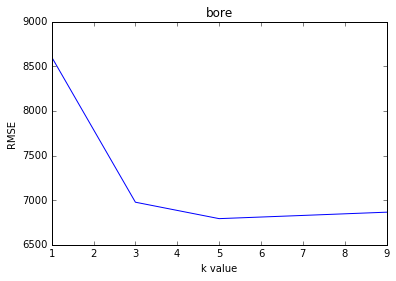

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [1,3,5,7,9]
y = [8602.58848450066, 6977.123411794459, 6793.0574839170895, 6828.8678082042015, 6865.299025218018]

plt.plot(x,y)
plt.title("bore")
plt.xlabel('k value')
plt.ylabel('RMSE')

The lowest RMSE for "bore" feature is when k = 5

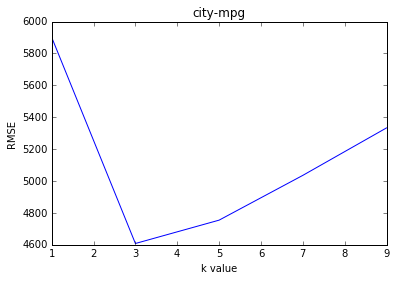

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [1,3,5,7,9]
y = ['5901.143574354764', '4608.180446380397', '4754.637378183515', '5035.456896910003', '5333.1616578530175']
plt.plot(x,y)
plt.title("city-mpg")
plt.xlabel('k value')
plt.ylabel('RMSE')

The lowest RMSE for "city-mpg" feature is when k = 3

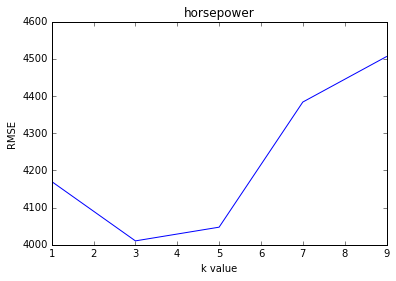

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [1,3,5,7,9]
y = ['4170.054848037801', '4010.5218032337666', '4047.376554982472', '4383.729138557079', '4505.9694416104885']
plt.plot(x,y)
plt.title("horsepower")
plt.xlabel('k value')
plt.ylabel('RMSE')

The lowest RMSE for "horsepower" feature is when k = 3

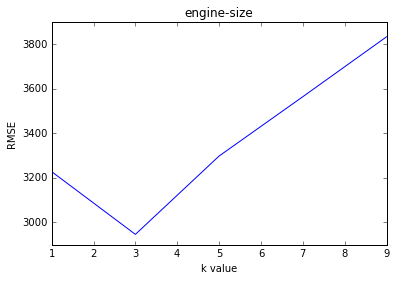

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [1,3,5,7,9]
y = [3227.659787364569, 2946.7417879781224, 3297.6997444813674, 3563.43509928404, 3831.764970642862]
plt.plot(x,y)
plt.title("engine-size")
plt.xlabel('k value')
plt.ylabel('RMSE')


The lowest RMSE for "engine-size" feature is when k = 3

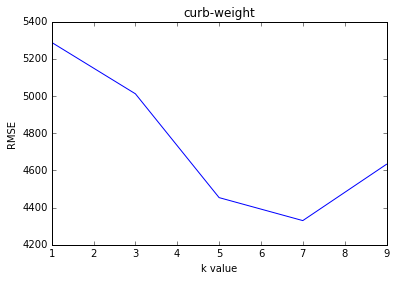

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [1,3,5,7,9]
y = [5288.0195725810245, 5011.8789151002, 4453.680702653493, 4330.149364501495, 4632.92525121302]
plt.plot(x,y)
plt.title("curb-weight")
plt.xlabel('k value')
plt.ylabel('RMSE')  

The lowest RMSE for "engine-size" feature is when k = 7

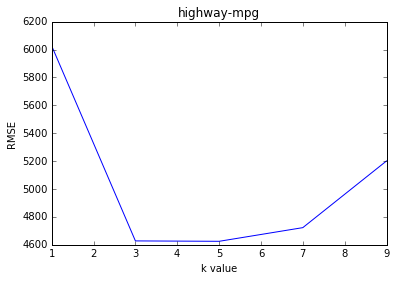

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [1,3,5,7,9]
y = [6025.594966720739, 4627.908507167689, 4625.047587445843, 4722.975580907234, 5201.019510000462]
plt.plot(x,y)
plt.title("highway-mpg")
plt.xlabel('k value')
plt.ylabel('RMSE') 


The lowest RMSE for "high-mpg" feature is when k = 7

In [34]:
k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6977.123411794459,
  5: 6793.0574839170895,
  7: 6828.8678082042015,
  9: 6865.299025218018},
 'city-mpg': {1: 5901.143574354764,
  3: 4608.180446380397,
  5: 4754.637378183515,
  7: 5035.456896910003,
  9: 5333.1616578530175},
 'compression-rate': {1: 8083.070177540802,
  3: 7379.623321663306,
  5: 6606.571345933599,
  7: 6732.032905446027,
  9: 7019.9512505224375},
 'curb-weight': {1: 5288.0195725810245,
  3: 5011.8789151002,
  5: 4453.680702653493,
  7: 4330.149364501495,
  9: 4632.92525121302},
 'engine-size': {1: 3227.659787364569,
  3: 2946.7417879781224,
  5: 3297.6997444813674,
  7: 3563.43509928404,
  9: 3831.764970642862},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8132.467731772246,
  7: 7704.344964170201,
  9: 7779.56469282989},
 'highway-mpg': {1: 6025.594966720739,
  3: 4627.908507167689,
  5: 4625.047587445843,
  7: 4722.975580907234,
  9: 5201.019510000462},
 'horsepower': {1: 4170.054848037801,
  3: 4010.5218032337

In [35]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
feature_avg_rmse

{'bore': 7213.387242726885,
 'city-mpg': 5126.5159907363395,
 'compression-rate': 7164.249800221235,
 'curb-weight': 4743.330761209847,
 'engine-size': 3373.4602779501924,
 'height': 8159.606697635715,
 'highway-mpg': 5040.509230448393,
 'horsepower': 4223.530357284321,
 'length': 5156.973124965849,
 'normalized-losses': 7619.681739188098,
 'peak-rpm': 8078.8223746725,
 'stroke': 7993.732370042334,
 'wheel-base': 5252.436178721009,
 'width': 4678.052062707216}

In [36]:
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
sorted_series_avg_rmse

engine-size          3373.460278
horsepower           4223.530357
width                4678.052063
curb-weight          4743.330761
highway-mpg          5040.509230
city-mpg             5126.515991
length               5156.973125
wheel-base           5252.436179
compression-rate     7164.249800
bore                 7213.387243
normalized-losses    7619.681739
stroke               7993.732370
peak-rpm             8078.822375
height               8159.606698
dtype: float64

In [37]:
sorted_features = sorted_series_avg_rmse.index
sorted_features

Index(['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg',
       'city-mpg', 'length', 'wheel-base', 'compression-rate', 'bore',
       'normalized-losses', 'stroke', 'peak-rpm', 'height'],
      dtype='object')

## Multivariate Model with default k value

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor() #default k=5
    np.random.seed(1)
        
    # Randomize order of rows in df to avoid bias
    shuffled_index = np.random.permutation(df.index)
    randomized_df = df.reindex(shuffled_index)

    # To find mid point to split
    mid = int(len(randomized_df) / 2)
    
    # Split train-test
    train_df = randomized_df.iloc[0:mid]
    test_df = randomized_df.iloc[mid:]
    
    # Fit a KNN model to data
    knn.fit(train_df[train_col], train_df[target_col])
    
    # Use model to make predictions
    predicted_price = knn.predict(test_df[train_col])

    # Calculate and return RMSE
    mse = mean_squared_error(test_df[target_col], predicted_price)
    rmse = np.sqrt(mse)
    return rmse
   

In [39]:
two_f_rmse = knn_train_test(['engine-size', 'horsepower'], 'price', normalized_df)
two_f_rmse

2938.1306900277887

In [40]:
three_f_rmse = knn_train_test(['engine-size', 'horsepower', 'width'], 'price', normalized_df)
three_f_rmse

3576.5381752208214

In [41]:
four_f_rmse = knn_train_test(['engine-size', 'horsepower', 'width', 'curb-weight'], 'price', normalized_df)
four_f_rmse

3435.145837075945

In [42]:
five_f_rmse = knn_train_test(['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg'], 'price', normalized_df)
five_f_rmse


3457.4725012114936

In [43]:
k_rmse_results = {}

for best_features in range(2,6):
    k_rmse_results[best_features] = knn_train_test(sorted_features[:best_features], 'price', normalized_df)

k_rmse_results

{2: 2938.1306900277887,
 3: 3576.5381752208214,
 4: 3435.145837075945,
 5: 3457.4725012114936}

Top 3: 
- two_f_rmse
- four_f_rmse 
- five_f_rmse

## Hyperparameter Tuning

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
        
    # Randomize order of rows in df to avoid bias
    shuffled_index = np.random.permutation(df.index)
    randomized_df = df.reindex(shuffled_index)

    # To find mid point to split
    mid = int(len(randomized_df) / 2)
    
    # Split train-test
    train_df = randomized_df.iloc[0:mid]
    test_df = randomized_df.iloc[mid:] 
    
    k_values = [val for val in range(1,25)]
    k_rmses = {}
    
    for k in k_values:
        # Instantiate ML Model
        knn = KNeighborsRegressor(n_neighbors=k)
    
        # Fit a KNN model to data
        knn.fit(train_df[train_col], train_df[target_col])
    
        # Use model to make predictions
        predicted_price = knn.predict(test_df[train_col])

        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], predicted_price)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses
   

In [45]:
two_f_rmse = knn_train_test(['engine-size', 'horsepower'], 'price', normalized_df)
two_f_rmse

{1: 2824.8287076781794,
 2: 2615.442453055988,
 3: 2676.6521480521455,
 4: 2831.7841198370656,
 5: 2938.1306900277887,
 6: 3128.516968715745,
 7: 3204.0554389097565,
 8: 3459.8826047221833,
 9: 3715.847780310613,
 10: 3980.307424292901,
 11: 4151.348212046468,
 12: 4231.233582321214,
 13: 4321.751665703992,
 14: 4366.489859575597,
 15: 4487.120412964203,
 16: 4591.609216968047,
 17: 4683.284404125849,
 18: 4739.084337496269,
 19: 4784.099214347852,
 20: 4777.706746763483,
 21: 4816.3918959481325,
 22: 4806.480777296786,
 23: 4832.819314595003,
 24: 4883.724636768665}

In [46]:
two_f_rmse_best_key = min(two_f_rmse, key=two_f_rmse.get)
two_f_rmse_best_key

2

In [47]:
three_f_rmse = knn_train_test(['engine-size', 'horsepower', 'width'], 'price', normalized_df)
three_f_rmse

{1: 3384.9422637192606,
 2: 3261.939437825234,
 3: 3142.577321948092,
 4: 3306.01101075266,
 5: 3576.5381752208214,
 6: 3709.4813226235947,
 7: 3610.411169953427,
 8: 3694.9374649086276,
 9: 3848.9692035290686,
 10: 3973.5807329145964,
 11: 4098.883214686969,
 12: 4217.8064717212055,
 13: 4298.670431349281,
 14: 4313.880284852934,
 15: 4276.188767893422,
 16: 4328.0136584447255,
 17: 4426.640031163671,
 18: 4479.751997091529,
 19: 4554.579568985269,
 20: 4613.211371771682,
 21: 4686.152660115985,
 22: 4753.536533973586,
 23: 4763.716083883271,
 24: 4805.5511802968185}

In [48]:
three_f_best_key = min(three_f_rmse, key=three_f_rmse.get)
three_f_best_key

3

In [49]:
four_f_rmse = knn_train_test(['engine-size', 'horsepower', 'width', 'curb-weight'], 'price', normalized_df)
four_f_rmse

{1: 2734.943456978825,
 2: 3094.990917547735,
 3: 3079.4233224582636,
 4: 3207.401445627884,
 5: 3435.145837075945,
 6: 3644.905717919087,
 7: 3639.209218512767,
 8: 3801.0236825048687,
 9: 3839.0853087451715,
 10: 3966.8524862569284,
 11: 4081.4936853188447,
 12: 4203.255322342342,
 13: 4280.433926612317,
 14: 4312.762148281075,
 15: 4377.178254265522,
 16: 4429.742402701652,
 17: 4409.3613048359975,
 18: 4416.406551030192,
 19: 4466.986485884836,
 20: 4515.818653745393,
 21: 4573.459747773273,
 22: 4642.593679558881,
 23: 4639.899018023205,
 24: 4704.718490639523}

In [50]:
four_f_rmse_best_key = min(four_f_rmse, key=four_f_rmse.get)
four_f_rmse_best_key

1

In [51]:
five_f_rmse = knn_train_test(['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg'], 'price', normalized_df)
five_f_rmse

{1: 2497.7039476088817,
 2: 2868.7261658018942,
 3: 3001.7694405929055,
 4: 3271.795489709763,
 5: 3457.4725012114936,
 6: 3666.511816712202,
 7: 3636.3673115750908,
 8: 3847.9789157124196,
 9: 3866.743418256884,
 10: 3987.374931214672,
 11: 4106.189726105007,
 12: 4170.144026373828,
 13: 4335.025936991862,
 14: 4418.156226327952,
 15: 4396.651192655495,
 16: 4402.239524609179,
 17: 4376.6804553468855,
 18: 4440.081780443606,
 19: 4499.44258688957,
 20: 4554.460823407689,
 21: 4577.501317867695,
 22: 4654.783948871329,
 23: 4708.4562065834325,
 24: 4777.553111455319}

In [52]:
five_f_rmse_best_key = min(five_f_rmse, key=five_f_rmse.get)
five_f_rmse_best_key

1

## Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]
cross_validation = pd.DataFrame()
for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, normalized_df[['engine-size', 'horsepower', 'width', 'curb-weight']], normalized_df["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))
    cross_validation.loc[fold, "avg RMSE"] =  avg_rmse
    cross_validation.loc[fold, "std RMSE"] =  std_rmse
cross_validation
    

3 folds:  avg RMSE:  3218.389789433508 std RMSE:  440.2057613490144
5 folds:  avg RMSE:  3053.3886085165354 std RMSE:  786.2328021127333
7 folds:  avg RMSE:  3042.5620036394944 std RMSE:  715.3545454220255
9 folds:  avg RMSE:  2822.0166504304493 std RMSE:  1144.5485597493694
10 folds:  avg RMSE:  2979.7998316897533 std RMSE:  987.9124616342266
11 folds:  avg RMSE:  2819.866092441361 std RMSE:  1263.8441587243235
13 folds:  avg RMSE:  2919.0827694960058 std RMSE:  1005.5359988000489
15 folds:  avg RMSE:  2799.7500410015514 std RMSE:  1254.0389540659191
17 folds:  avg RMSE:  2754.3109541979884 std RMSE:  1276.953790494135
19 folds:  avg RMSE:  2744.2918346339816 std RMSE:  1406.847031899731
21 folds:  avg RMSE:  2665.3360231081338 std RMSE:  1577.7138469519493
23 folds:  avg RMSE:  2659.253738991456 std RMSE:  1499.6848771062919


,avg RMSE,std RMSE
3,3218.389789,440.205761
5,3053.388609,786.232802
7,3042.562004,715.354545
9,2822.016650,1144.548560
10,2979.799832,987.912462
11,2819.866092,1263.844159
13,2919.082769,1005.535999
15,2799.750041,1254.038954
17,2754.310954,1276.953790
19,2744.291835,1406.847032


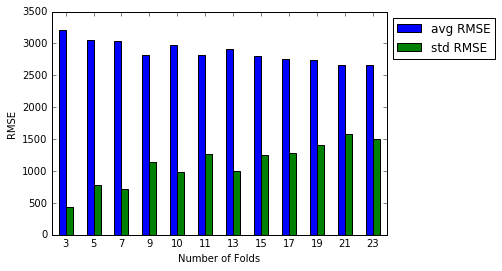

In [54]:
cross_validation.plot(kind="bar")
plt.legend(bbox_to_anchor=[1, 1], loc="best")
plt.xlabel("Number of Folds")
plt.ylabel("RMSE")
plt.xticks(rotation=0)
plt.show()

From the chart above we can see that folds = 3 has the lowest RMSE 